In [1]:
#below example is using a logitistic regression unit
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials import mnist

In [3]:
data = mnist.input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
import matplotlib.pyplot as plt

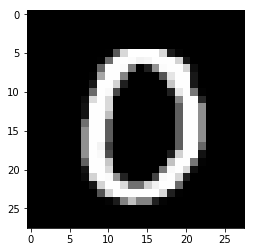

In [5]:
single_image = data.train.images[10].reshape(28,28)
plt.imshow(single_image,cmap='gist_gray')

In [32]:
single_image.max()

0.9960785

In [33]:
#PLACEHOLDER
#VARIABLES
#CREATE GRAPH OPERATION
#LOSS FUNCTION
#OPTIMIZER
#CREATE SESSION
x = tf.placeholder(tf.float32,shape=(None,784))

In [34]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [35]:
y = tf.matmul(x,W) + b

In [36]:
y_true = tf.placeholder(tf.float32,[None,10])

In [37]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_true))

In [38]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.05)
train = optimizer.minimize(cross_entropy)

In [39]:
init = tf.global_variables_initializer()

In [65]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1500):
        batch_x,batch_y = data.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print(sess.run(acc,feed_dict={x:data.test.images,y_true:data.test.labels}))

0.9073


In [52]:
a  = [True,False,True,False,True,False,True]
b = tf.cast(a,tf.float32)

In [62]:
a = [[1,2],[4,3]]

In [63]:
import numpy as np
np.argmax(a,1)

array([1, 0])

In [69]:
#tensorflow CNN example

In [166]:
#defining  different helper functions

In [6]:
#intial weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

In [7]:
def init_bias(shape):
    init_bias = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias)

In [8]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [9]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [10]:
def convolutional_layer(input_x,shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W) + b)

In [11]:
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer,W)+b

In [12]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [13]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [14]:
x_image = tf.reshape(x,[-1,28,28,1])

In [15]:
#defining conv layer

In [16]:
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [17]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2) 

In [18]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [19]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob = hold_prob)

In [20]:
y_pred = normal_full_layer(full_one_dropout,10)

In [21]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [38]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)

In [39]:
train = optimizer.minimize(cross_entropy)

In [40]:
init = tf.global_variables_initializer()

In [41]:
steps = 1000

In [42]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x,batch_y = data.train.next_batch(50)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        if i%100 ==0 :
            print('epoch: {}'.format(i))
            print('accuracy: ')
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            print(sess.run(acc,feed_dict={x:data.test.images[:1000],y_true:data.test.labels[:1000],hold_prob:1.0}))
            print('\n')

epoch: 0
accuracy: 
0.129


epoch: 100
accuracy: 
0.834


epoch: 200
accuracy: 
0.879


epoch: 300
accuracy: 
0.903


epoch: 400
accuracy: 
0.922


epoch: 500
accuracy: 
0.927


epoch: 600
accuracy: 
0.935


epoch: 700
accuracy: 
0.938


epoch: 800
accuracy: 
0.937


epoch: 900
accuracy: 
0.948




In [33]:
data.test.images[:1000].shape

(1000, 784)

In [43]:
#creating my

In [ ]:
#getting the dataset
